# Банки — Анализ оттока клиентов

## Материалы

Презентация: https://disk.yandex.ru/i/q1skrhtXYGqxsw <br>
Дэшборд: https://public.tableau.com/views/bank_16625768849080/Sheet1?:language=en-US&:display_count=n&:origin=viz_share_link

## Введение

Существует проблема оттока клиентов банка «Метанпром». Данный банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Клиент считается ушедшим, если он попросил закрыть договор о дальнейшем сотрудничестве

**Цель исследования:**

Провести анализ и подготовить план действий по удержанию клиентов
<br><br>
**Ход исследования:**

Данное исследование будет разбито на несколько больших частей:
<br>
- Обработка и подготовка исходных данных к анализу;
- Сформировать типичные портреты клиентов;
- Проанализировать основные признаки, наиболее сильно влияющие на отток;
- Сформулировать и проверить статистические гипотезы, влияющие на отток клиентов;
- Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
 - выделить целевые группы клиентов
 - предложить меры по снижению оттока
 - определить другие особенности взаимодействия с клиентами

Перед началом основной части исследования неободимо проверить все необходимые данные на ошибки и оценить их влияние на дальнейшее исследование, а на этапе предобработки найти возможность исправить самые критичные ошибки данных

После каждого проделанного шага будут оставлены комментарии, а после каждой части исследования - необходимые выводы. В конце всего исследования будут даны необходимые рекомендации

## Загрузить данные и подготовить их к анализу

Менеджер банка «Метанпром» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые которые содержат данные о клиентах и об их оттоке

<br>**Загрузим необходимые библиотеки:**

In [1]:
import pandas as pd
from io import BytesIO
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<br>**Откроем исходный датафрейм, выгрузив его из "Google Диска":**

In [2]:
spreadsheet_id = '1nUZE9HzrPbgGwCYJjyy-eP7aqUgzcrx4zfuMBp85Rwo'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


<br>**Отобразим всю необходимую информацию о исходном файле:**

In [3]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Предварительные результаты после обзора данных следующие:**
- Дана таблица, состоящая из 12 столбов и 10000 строк;
- Тип данных: *float64(2)*, *int64(8)*, *object(2)*;
- Размер данных: 937.6 KB;
- Название и описание соддержания столбцов:
 - *userid* — id клиента;
 - *score* — система оценки кредитоспособности (кредитных рисков) лица;
 - *City* — город, где находится банк; 
 - *Gender* — пол клиента;
 - *Age* — возраст;
 - *Objects* — количество объектов, находящиеся в собственности клиента (дома, квартиры, машины и пр.);
 - *Balance* — счет в рублях;
 - *Products* — количество продуктов (в т.ч. кредитной карты), которыми пользуется клиент;
 - *CreditCard* — наличие кредитной карты;
 - *Loyalty* — значимые операции за последнее время;
 - *estimated_salary* — оценочная зарплата, высчитанная моделью;
 - *Churn* — факт оттока

 
**Необходимая предобработка заключается в следующем:**
- Привести названия столбцов к нижнему, "змеиному" регистру;
- Проверить на наличие аномалий;
- Проверить на пропуски и на наличие дубликатов;
- Привести столбцы `Gender`, `City` к бинарному виду

<br> **Приведем названия столбцов к нижнему, "змеиному" регистру и затем выведем их на экран:**

In [4]:
df.columns = df.columns.str.lower() 
df =  df.rename(columns={'userid':'user_id', 'creditcard':'credit_card'})

df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

<br>**Приведем столбцы `gender` и `city` к бинарному виду**:

In [5]:
# Для столбца "gender" сначала заменим соответственно значения "М" и "Ж" на "1" и "0":
df['gender'] = df['gender'].str.replace("М", '1')
df['gender'] = df['gender'].str.replace("Ж", '0')
df['gender'] = df['gender'].astype('int')

# Для стобца "city" сначала сделаем разбивку по городам, затем названия стобцов приведем в необходимый вид:
bank = df.copy() # оставим также на всякий случай исходный датафрейм
bank = pd.get_dummies(bank, columns=["city"])
bank =  bank.rename(columns={'city_Ростов Великий':'Ростов Великий', 'city_Рыбинск':'Рыбинск', 'city_Ярославль':'Ярославль'})

# Выведем таблицу:
bank.head()
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   objects           10000 non-null  int64  
 5   balance           6383 non-null   float64
 6   products          10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   loyalty           10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
 11  Ростов Великий    10000 non-null  uint8  
 12  Рыбинск           10000 non-null  uint8  
 13  Ярославль         10000 non-null  uint8  
dtypes: float64(2), int64(9), uint8(3)
memory usage: 888.8 KB


<br>**Проверим файлы на наличие дубликатов и пропусков по столбцам:**

In [6]:
print('Количество дубликатов:')
print(bank.duplicated().sum(), '\n')

print('Количество скрытых дубликатов (без учета столбца с id):')
print(bank.drop(columns=['user_id']).duplicated().sum(), '\n')

print('Количество пропусков по столбцам:')
print(bank.isna().sum())

Количество дубликатов:
0 

Количество скрытых дубликатов (без учета столбца с id):
0 

Количество пропусков по столбцам:
user_id                0
score                  0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
Ростов Великий         0
Рыбинск                0
Ярославль              0
dtype: int64


<br> *Проверим информацию по датафрейму, в котором незаполнен столбец `balance` и в котором отсутствуют пропуски:*

In [7]:
display(bank[bank['balance'].isna()].describe())

display(bank[~bank['balance'].isna()].describe())

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,Ростов Великий,Рыбинск,Ярославль
count,3.617000e+03,3617.000000,3617.000000,3617.000000,3617.000000,0.0,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.0,3617.000000,3617.000000
mean,1.573469e+07,649.452861,0.542715,38.434891,5.071330,NaN,1.784628,0.716616,0.517832,98983.559549,0.138236,0.0,0.331490,0.668510
std,7.194749e+04,96.158798,0.498241,10.492002,2.860781,NaN,0.496455,0.450704,0.499751,57730.828955,0.345195,0.0,0.470814,0.470814
min,1.560844e+07,350.000000,0.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,90.070000,0.000000,0.0,0.000000,0.000000
25%,1.567226e+07,583.000000,0.000000,31.000000,3.000000,NaN,1.000000,0.000000,0.000000,49506.820000,0.000000,0.0,0.000000,0.000000
50%,1.573608e+07,651.000000,1.000000,37.000000,5.000000,NaN,2.000000,1.000000,1.000000,98618.790000,0.000000,0.0,0.000000,1.000000
75%,1.579629e+07,717.000000,1.000000,43.000000,7.000000,NaN,2.000000,1.000000,1.000000,148330.970000,0.000000,0.0,1.000000,1.000000
max,1.585810e+07,850.000000,1.000000,88.000000,10.000000,NaN,4.000000,1.000000,1.000000,199992.480000,1.000000,0.0,1.000000,1.000000


,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,Ростов Великий,Рыбинск,Ярославль
count,6.383000e+03,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000
mean,1.573310e+07,651.138493,0.547392,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240796,0.393075,0.200219,0.406705
std,7.192913e+04,96.934609,0.497788,10.476208,2.909514,30095.056462,0.577011,0.458641,0.499855,57380.316584,0.427600,0.488472,0.400196,0.491257
min,1.560844e+07,350.000000,0.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,1.567094e+07,584.000000,0.000000,32.000000,2.000000,100181.975000,1.000000,0.000000,0.000000,51736.850000,0.000000,0.000000,0.000000,0.000000
50%,1.573226e+07,652.000000,1.000000,38.000000,5.000000,119839.690000,1.000000,1.000000,1.000000,101139.300000,0.000000,0.000000,0.000000,0.000000
75%,1.579584e+07,718.000000,1.000000,44.000000,8.000000,139512.290000,2.000000,1.000000,1.000000,149596.615000,0.000000,1.000000,0.000000,1.000000
max,1.585843e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000,1.000000,1.000000,1.000000


Судя по данным выше, в столбце `balance` - дебетовый счет в банке. Так как открытие счета - не обязательная процедура в банке, поэтому все пропуски в столбце `balance` означают, что счет попросту там не открыт на момент выгрузки информации

Стоить отметить, что клиенты, у которых нет дебетового счета - не из Ростова и меньше склонны к уходу, что интересно в рамках дальнейшего исследования

<br>*Убедившись в том, что значение в стобце `balance` - дебетовый счет, создадим отдельный столбец под названием `account`, в зависимости от того, заполнено ли значение `balance` или нет (1 - открыт по крайней мере  один счет, 0 - счета нет):*

In [8]:
s = bank['balance'].isna()
bank['account'] = np.where(s, 0, 1)


bank.describe()

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,Ростов Великий,Рыбинск,Ярославль,account
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,0.545700,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.501400,0.638300
std,7.193619e+04,96.653299,0.497932,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.500023,0.480517
min,1.560844e+07,350.000000,0.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.567126e+07,584.000000,0.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.573347e+07,652.000000,1.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.579597e+07,718.000000,1.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.585843e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000


Пропуски трогать не будем, т.к. ничем другим их не заменить, зато при составлении портрета клиентов банков будем ссылаться в том числе и к значениям из новосозданного столбца `account`

После изучения пропусков пришла следующая идея: так как дебетовый счет - самый распространенный продукт банка, то определим активность клиента путем вычитания наличия дебетового счета `account` от количества продуктов банка `products`. Если разница будет равна нулю, то клиент неактивный, если больше нуля - то активный

*Создадим столбец, где будет результат вычетания значения `products` от `account`*:

In [9]:
bank['active'] = bank['products'] - bank['account'] 

bank.head()

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,Ростов Великий,Рыбинск,Ярославль,account,active
0,15677338,619,0,42,2,NaN,1,1,1,101348.88,1,0,0,1,0,1
1,15690047,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,15662040,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,2
3,15744090,699,0,39,1,NaN,2,0,0,93826.63,0,0,0,1,0,2
4,15780624,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0


*Изменим данные в новосозданном столбце: если там изначально число больше нуля, то заменим его на 1, если там было 0, то оставим как есть*

In [10]:
bank.loc[bank['active']>0, 'active'] = 1

bank.head()

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,Ростов Великий,Рыбинск,Ярославль,account,active
0,15677338,619,0,42,2,NaN,1,1,1,101348.88,1,0,0,1,0,1
1,15690047,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,15662040,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,1
3,15744090,699,0,39,1,NaN,2,0,0,93826.63,0,0,0,1,0,1
4,15780624,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0


Теперь в столбце `active` указаны данные об активности клиента: если он имеет что-то помимо дебетового счета в банке, то он считается активным (значение "1"), если нет, то он неактивный клиент ("0")

<br>*Создадим столбец, где в зависимости от возраста клиента, укажем принадлежность к поколоению юношей, взрослых и пенсионеров:*

In [11]:
bank.loc[(bank['age']>18) & (bank['age']<=30), 'generation'] = 'young'

bank.loc[(bank['age']>30) & (bank['age']<60) & (bank['gender']==0), 'generation'] = 'adult'
bank.loc[(bank['age']>30) & (bank['age']<65) & (bank['gender']==1), 'generation'] = 'adult'

bank.loc[(bank['age']>=60) & (bank['gender']==0), 'generation'] = 'pensioner'
bank.loc[(bank['age']>=65) & (bank['gender']==1), 'generation'] = 'pensioner'

bank.head()

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,Ростов Великий,Рыбинск,Ярославль,account,active,generation
0,15677338,619,0,42,2,NaN,1,1,1,101348.88,1,0,0,1,0,1,adult
1,15690047,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0,adult
2,15662040,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,1,adult
3,15744090,699,0,39,1,NaN,2,0,0,93826.63,0,0,0,1,0,1,adult
4,15780624,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0,adult


### Подведем итог первой части проекта

- открыли файлы необоходимые для анализа, изучили исходные данные;
<br>
- проверили данные на отсутствие аномалий;
<br>
- привели названия столбцов к нижнему, "змеиному" регистру;
<br>
- проверили таблицу на отсутствие пропусков и дубликатов, обнаруженные пропуски в столбце `balance` оставили нетронутыми, т.к. заменить их нечем;
<br>
- в ходе поиска причины возникновения пропусков создали столбец `account`, в котором в зависимости наличия счета банка, ввели данные;
<br>
- также создали столбец `active`, где дали характеристику клиента в зависимости от использования услугами банка;
<br>
- привели столбцы `gender` и `city` к бинарному виду
<br>

**Результат проделанной работы: данные готовы для дальнейшего анализа!**

## Проведем исследовательский анализ данных (EDA)

### Изучим средние значения и стандартные отклонения:

In [12]:
bank.describe()

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,Ростов Великий,Рыбинск,Ярославль,account,active
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,0.545700,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.501400,0.638300,0.582100
std,7.193619e+04,96.653299,0.497932,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.500023,0.480517,0.493238
min,1.560844e+07,350.000000,0.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.567126e+07,584.000000,0.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.573347e+07,652.000000,1.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1.579597e+07,718.000000,1.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.585843e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*Определим долю клиентов банка от количества местных жителей по городам:*

In [13]:
# в знаменателе - число жителей города, взятые из Википедии
x1 = (bank[bank['Ростов Великий'] == 1].shape[0]) / 30406
x2 = (bank[bank['Рыбинск'] == 1].shape[0]) / 197359
x3 = (bank[bank['Ярославль'] == 1].shape[0]) / 597161


print(f'Доля клиентов банка от общего числа населения в г. Ростов Великий: {x1:.1%}')
print(f'Доля клиентов банка от общего числа населения в г. Рыбинск: {x2:.1%}')
print(f'Доля клиентов банка от общего числа населения в г. Ярославль: {x3:.1%}')

Доля клиентов банка от общего числа населения в г. Ростов Великий: 8.3%
Доля клиентов банка от общего числа населения в г. Рыбинск: 1.3%
Доля клиентов банка от общего числа населения в г. Ярославль: 0.8%


1. *Клиенты банка это:*
 - Мужчины и женщины примерно в равном соотношении, которым около 38 лет;
 - Больше всего клиентов банка из Ярославля (50,1% от общего числа), далее идет Рыбинск(25,1%), затем Ростов(24,9%);
 - Самая большая долю клиентов банка от общего количества населения города у Ростова (8,1%), затем у Рыбинск(1,3%) и Ярославля (0,8%);
 - Количество имуществ в наличии около 5
<br><br>
2. *Информация о клиентах на основе их истории активности в банке:* 
 - Примерно половина клиентов имеют из услуг только дебетовую карту;
 - Кредитный скоринг у большого числа клиентов банка достаточен для того, чтобы взять кредит;
 - Те, у кого есть дебетовый счет, в среднем имеют на нем в районе 120,000 рублей;
 - Большая часть клиентов имеет кредитную карту и счет в банке;
 - Имеют более одного продукта банка;
 - Средняя ЗП в районе 100,000 рублей 
<br><br>
3. *Заметен большой отток клиентов, что лишь добавляет актуальности к дальнейшему исследованию*

### Посмотрим на средние значения в двух группах — тех, кто ушел в отток и тех, кто остался по портретным признакам клиентов:

In [14]:
print('\nОбщий портрет клиентов:')
display(bank.groupby(['churn']).mean())


Общий портрет клиентов:


,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,Ростов Великий,Рыбинск,Ярославль,account,active
churn,,,,,,,,,,,,,,,
0,1.573390e+07,651.853196,0.572523,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772,0.212859,0.259199,0.527942,0.608565,0.609695
1,1.573279e+07,645.351497,0.440844,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531,0.399607,0.202749,0.397644,0.754541,0.474227


**Характерные закономерности, выявленные в ходе изучения данных выше**:

- Клиенты женского пола более склоны к оттоку чем мужчины;
- Из Ростова самый большой отток клиентов;
- Клиенты, которые владеют большим количеством продуктов (в т.ч. не только дебетовым счетом), меньше склонны к оттоку;
- Клиенты, которые за последнее время хоть раз посетили банк, меньше уходят после него;
- Клиенты более склонного возраста чаще уходят из банка

### Характерные различия между двумя группами попробуем визуализировать при помощи гистограмм

*Построим функцию для поочередного вывода на экран столбчатых гистограмм с распределением того факта, клиент попал в отток или нет, в зависимости от различных исходных признаков*:

In [15]:
bank_churn = bank.copy(deep=True)
bank_churn['churn'] = bank_churn['churn'].replace(1, "попал в отток")
bank_churn['churn'] = bank_churn['churn'].replace(0, "не попал в отток")


def hist(column, parameter, parameter1):

    plt.figure(figsize=(6,6))
    
    sns.barplot(y=column, x='churn', hue='churn', data=bank_churn, estimator=np.mean)
    plt.legend([],[], frameon=False)
    plt.ylabel(f'{parameter1}',fontsize = 15)
    plt.xlabel(f"распределение ср.значения оттока клиентов",fontsize = 15)

    plt.title(f'Гистограмма распределения среднего значения оттока клиентов в зависимости {parameter}', fontsize=20)

    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)

    return plt.show()

#### Выведем на экран гистограмму распределения факта оттока клиентов в зависимости:

<br>1. **От пола клиента:**

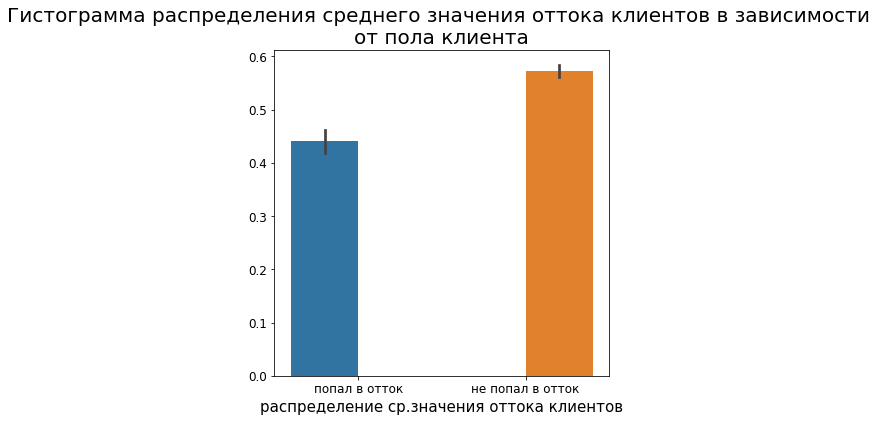

In [16]:
hist('gender', '\nот пола клиента', '')

**Вывод:** женщины более склоны к уходу. Для объяснения причины данного факта необходимо больше информации о клиентах

<br>2. **От возраста клиента:**

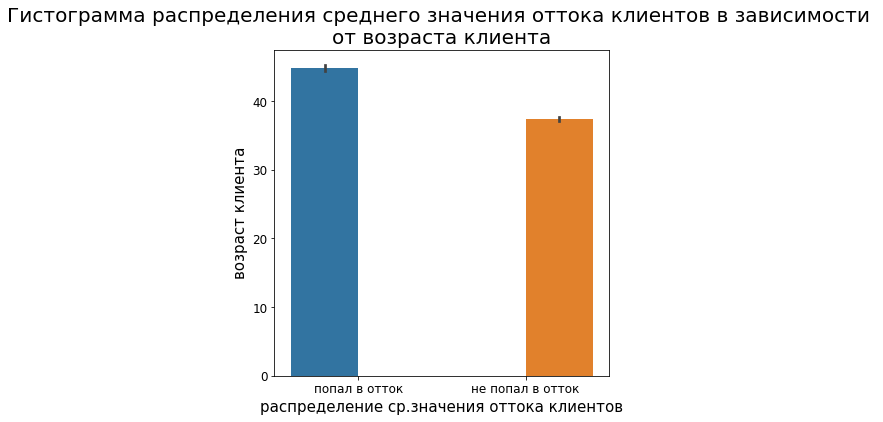

In [17]:
hist('age', '\nот возраста клиента', 'возраст клиента')

**Вывод:** клиенты старшего возраста более склоны к уходу

*Проверим какой возрастной контингент более склонен к оттоку:*

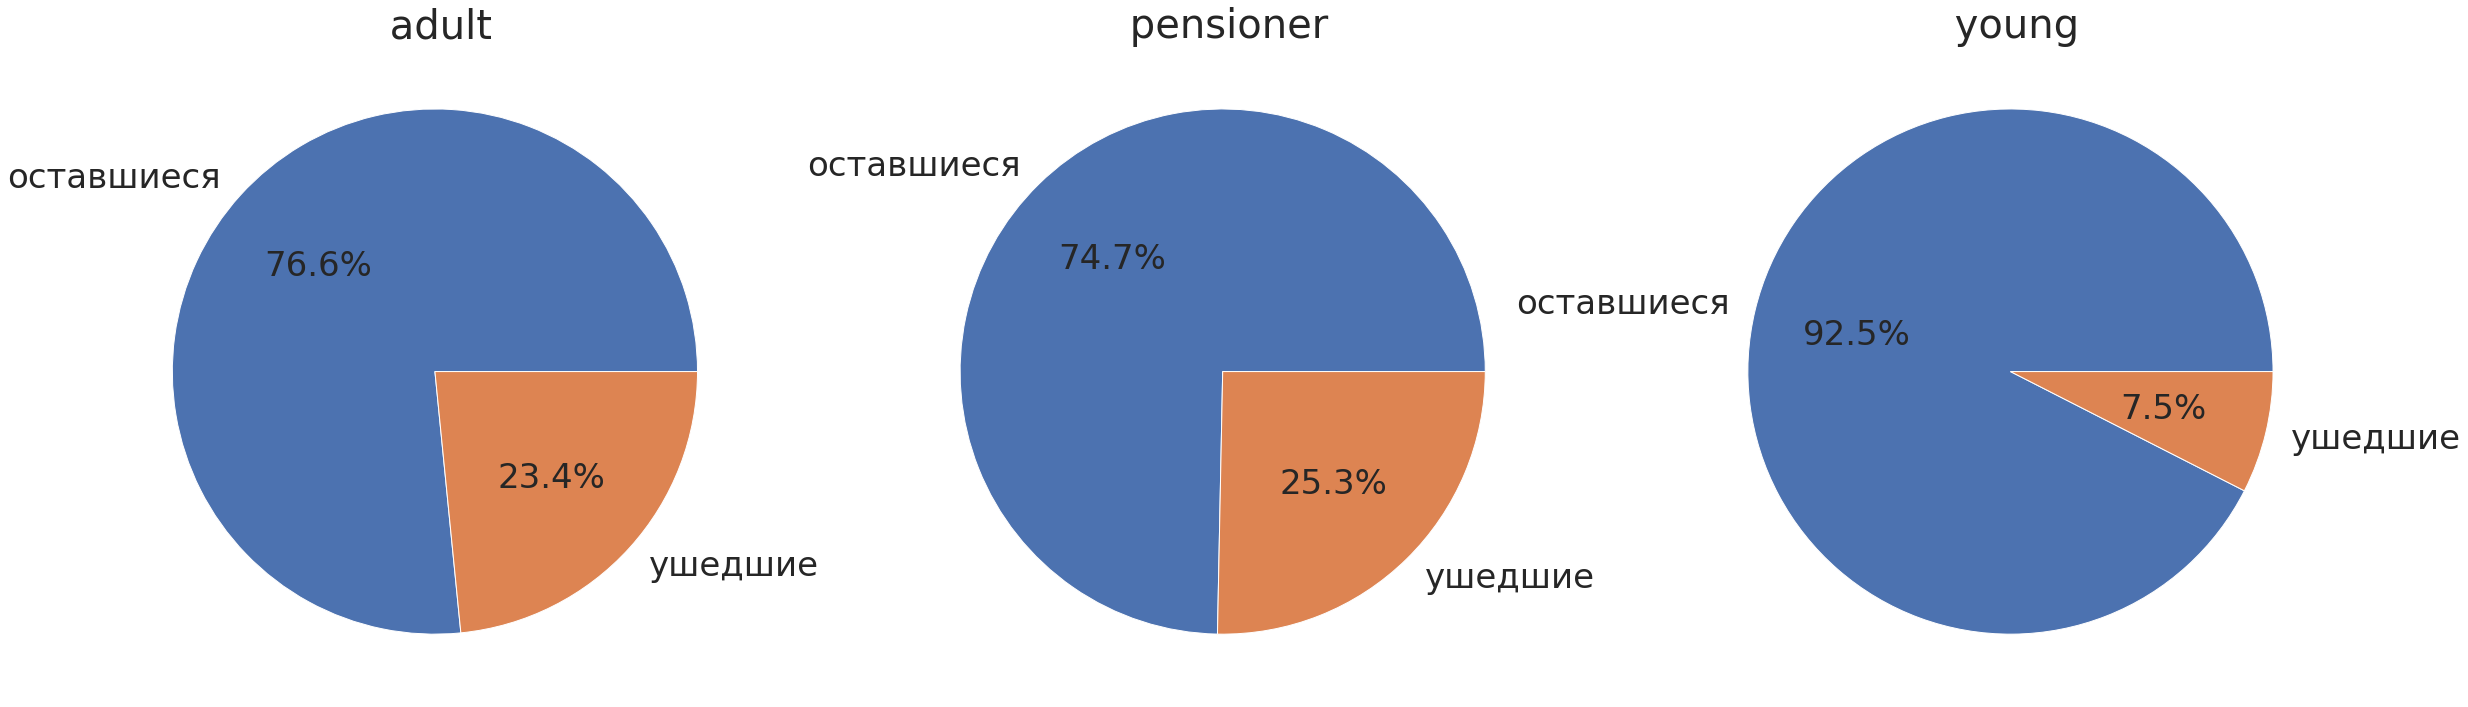

generation,churn,adult,pensioner,young
0,0,5848,295,1800
1,1,1789,100,146


In [30]:
plt.figure(figsize=(40, 40))
t = bank.pivot_table(index='churn',columns='generation',values='age', aggfunc='count').reset_index()

labels=['оставшиеся', 'ушедшие']

for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.pie(x=t[t.columns[i+1]], labels=labels, textprops={'fontsize': 34}, autopct='%1.1f%%')
    ax.set_title(f' {t.columns[i+1]}', fontsize=40)

plt.show()
t

**Вывод:** пенсионеры более склонны к оттоку относительно других возрастных групп, с небольшим отрывом далее идет возрастная группа (клиенты от 30 до пенсионного возраста). Меньше всего уходят с банка клиенты более юного возраста (до 30 лет)

*Проверим, что не устраивает возрастной группе наших клиентов в банке:*

In [19]:
cm = sns.light_palette("#bff5f5", as_cmap=True) #самое большое число в каждом столбце будет высвечиваться голубым цветом
(bank[bank['age'] > 30]).groupby(['churn']).mean().style.background_gradient(cmap=cm)

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,Ростов Великий,Рыбинск,Ярославль,account,active
churn,,,,,,,,,,,,,,,
0,15734669.521081,651.935699,0.574963,40.609800,5.020511,119528.665777,1.539313,0.706007,0.563406,99338.414135,0.211297,0.265017,0.523685,0.612893,0.607032
1,15732628.652726,645.253573,0.443092,46.266808,4.920593,120266.407451,1.474325,0.697724,0.362096,101493.594950,0.401271,0.196930,0.401800,0.751720,0.477501


**Вывод:** клиенты старшей возрастной группы, которые склоны к уходу, к моменту выгрузки данных давно не посещали банк. 

Данный вывод отобразим графически ниже


                       Отток возрастных клиентов (от 30 лет) в зависимости от значения параметра "loyalty"



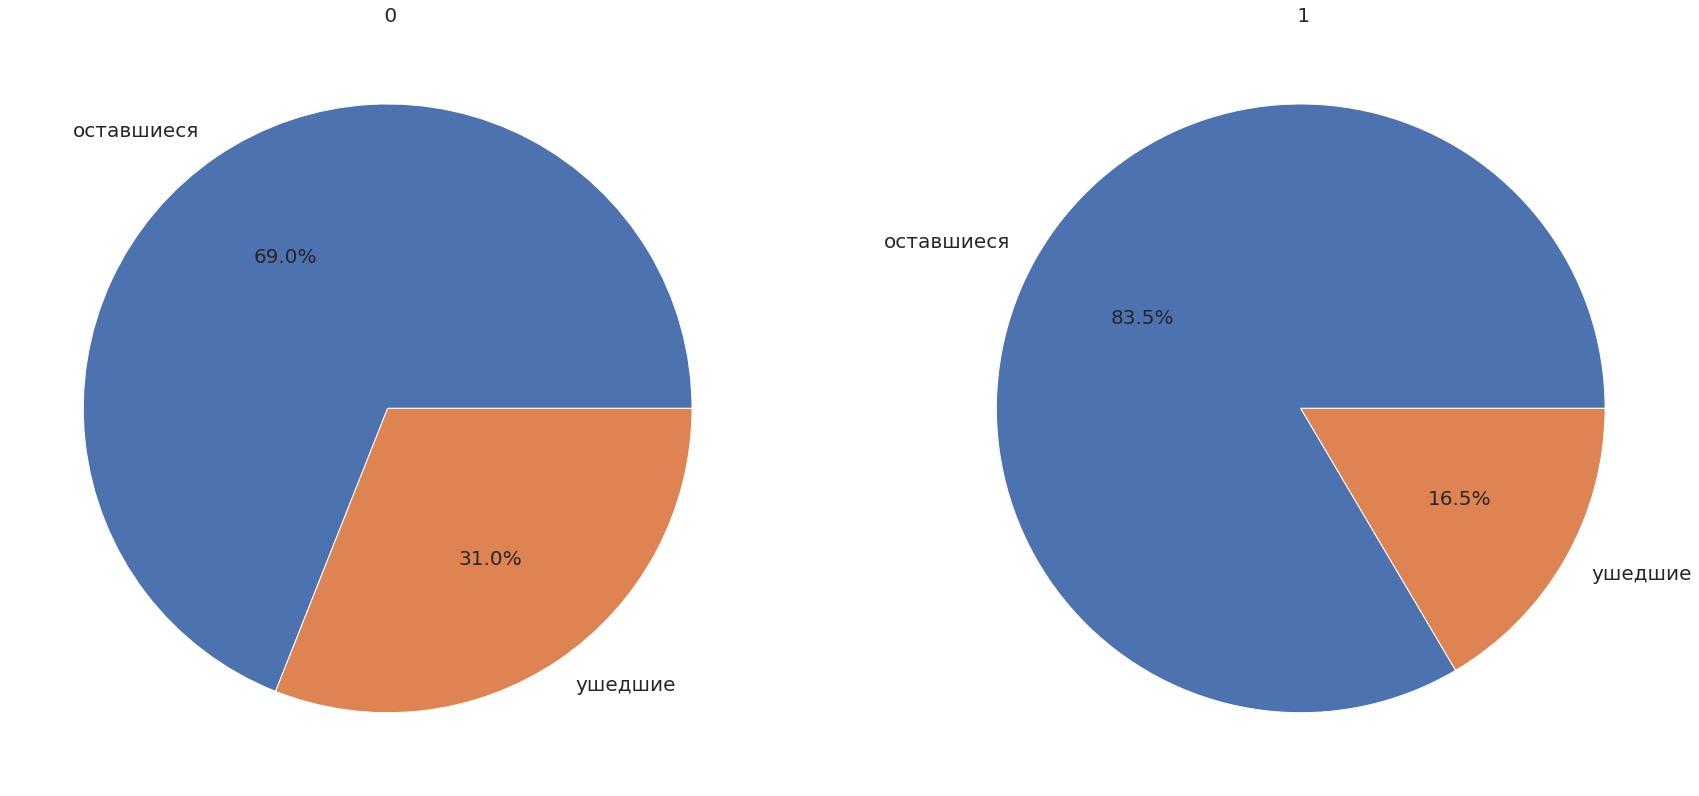

loyalty,churn,0,1
0,0,2682,3461
1,1,1205,684


In [34]:
t1 = bank[bank['age'] > 30].pivot_table(index='churn',columns='loyalty',values='age', aggfunc='count').reset_index()
labels=['оставшиеся', 'ушедшие']

plt.figure(figsize = (30, 30))

for i in range(2):
    fig = plt.subplot(1, 2, i + 1)
    plt.pie(x=t1[t1.columns[i+1]], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
    fig.set_title(f' {t1.columns[i+1]}', fontsize=20)  
    
print('\n                       Отток возрастных клиентов (от 30 лет) в зависимости от значения параметра "loyalty"\n')    
plt.show()

t1.style.bar(align='mid', vmin=600, vmax=5000, width=100)

**Итог**: 

Люди более старшего возраста (от 30 лет) более склоны к уходу из банка. Клиенты пенсионного возраста чаще всего уходят с банка относительно других клиентов. Причина возможно кроется в том, что клиенты чем старше тем более подвержены к накоплению средств и меньше нуждаются в более обширном потреблении услуг банкае. Также, исследовав исходные данные, опредлелили, что возрастные клиенты, которые более склонны к посещению банков, меньше отказываются в дальнейшем к его посещению
<br><br>

**Возможное решение по сокращению оттока**: 
- создавать благоприятные условия для открытия накопительных счетов с созданием более высоких процентов для пенсионеров;
- необходимо увеличить количество филиалов в городе присутствия, увеличить качество обслуживания, а также развивать мобильный банк с целью сокращения дальнейшего оттока

<br>3. **От наличия факта совершения значимых операций клиентом за последнее время:**

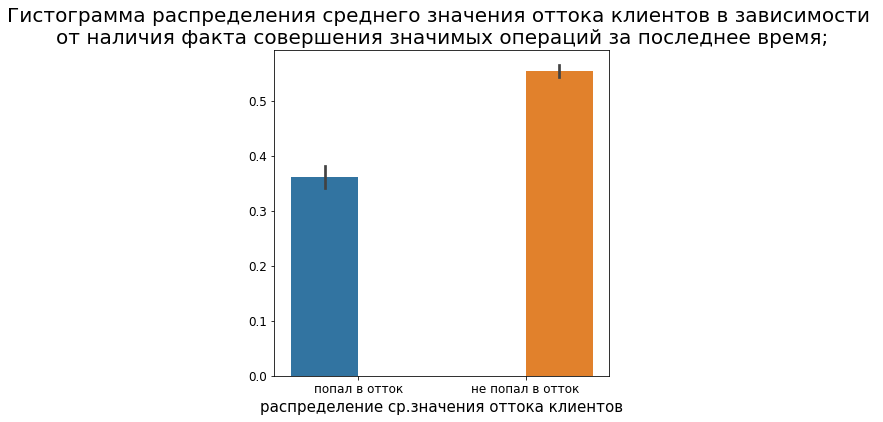

In [21]:
hist('loyalty', '\nот наличия факта совершения значимых операций за последнее время;', '')

**Вывод**: как говорилось ранее, возможный отток клиентов связан с тем, что им проблематично посещать банк "Метанпром" в связи с его невысоким уровнем покрытия в городах присутствия. Также возможно, что причина оттока связана с затруднением нахождения общего языка между клиентами и сотрудниками банка

**Необходимо:** 
- повышать клиентоориентированность персонала банка путем проведения тренингов и различных семинаров по повышению клиентоориентированности;
- повысить доступность услуг банка путем увеличения количество его филиалов в городе присутствия, а также при помощи развития мобильного банка для удаленного пользования

<br>4. **От использования продуктов банка:**

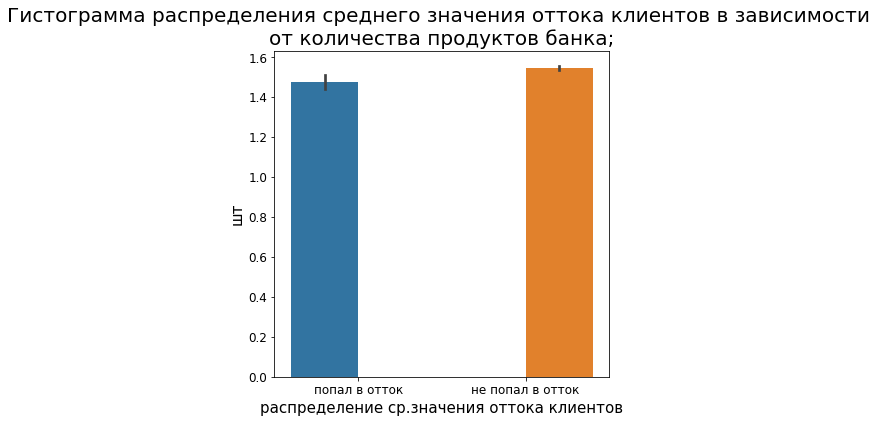

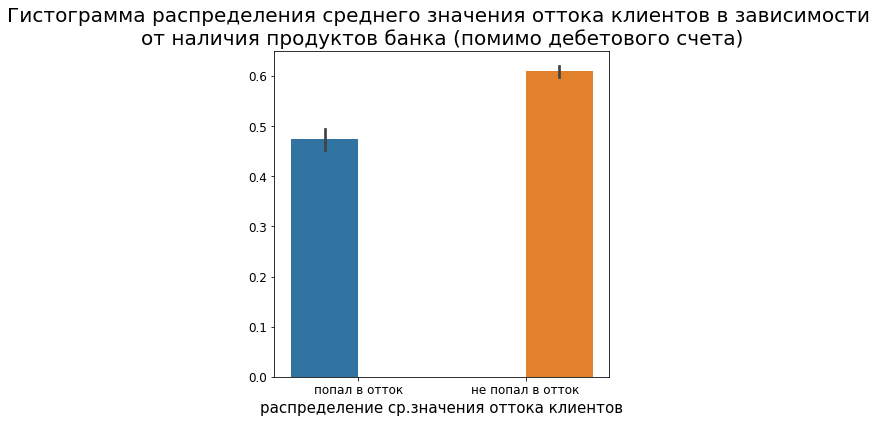

In [22]:
hist('products', '\nот количества продуктов банка;', 'шт')
hist('active','\nот наличия продуктов банка (помимо дебетового счета)', '')

**Вывод**: Нет явной зависимости факта оттока клиента от количества имеющегося у него в наличии продуктов и услуг банка. Но стоит из предоставляемых услуг банка вычесть дебетовую карту, то выресовывается закономерность, что чем больше продуктов банка у клиета (помимо дебетовой карты), то тем меньше вероятность его оттока

Выше изложенный факт говорит о том, что нет продуктов в наличии банка, которые бы подходили индивидуально каждому клиенту, поэтотму наши клиенты уходят в банки наших конкурентов
<br><br>
**Необходимо:**
- привлекать клиентов доступным кредитованием (в т.ч. ипотека);
- привлекать крупным процентам по вкладам;
- начислять кэшбек за покупки в т.ч. и при оплачивании покупок кредитной картой;
- продвигать сотрудничество с компаниями, которые бы предоставляли свою скидку клиентам нашего банка
- у прямых конкурентов, которые сейчас на подъеме, проверить чем они смогли заинтересовать раннее наших клиентов, чтобы проанализировав их подход, перенять у них лучший опыт, чтобы наш банк оставался в тренде

<br>5. **От города проживания наших клиентов:**

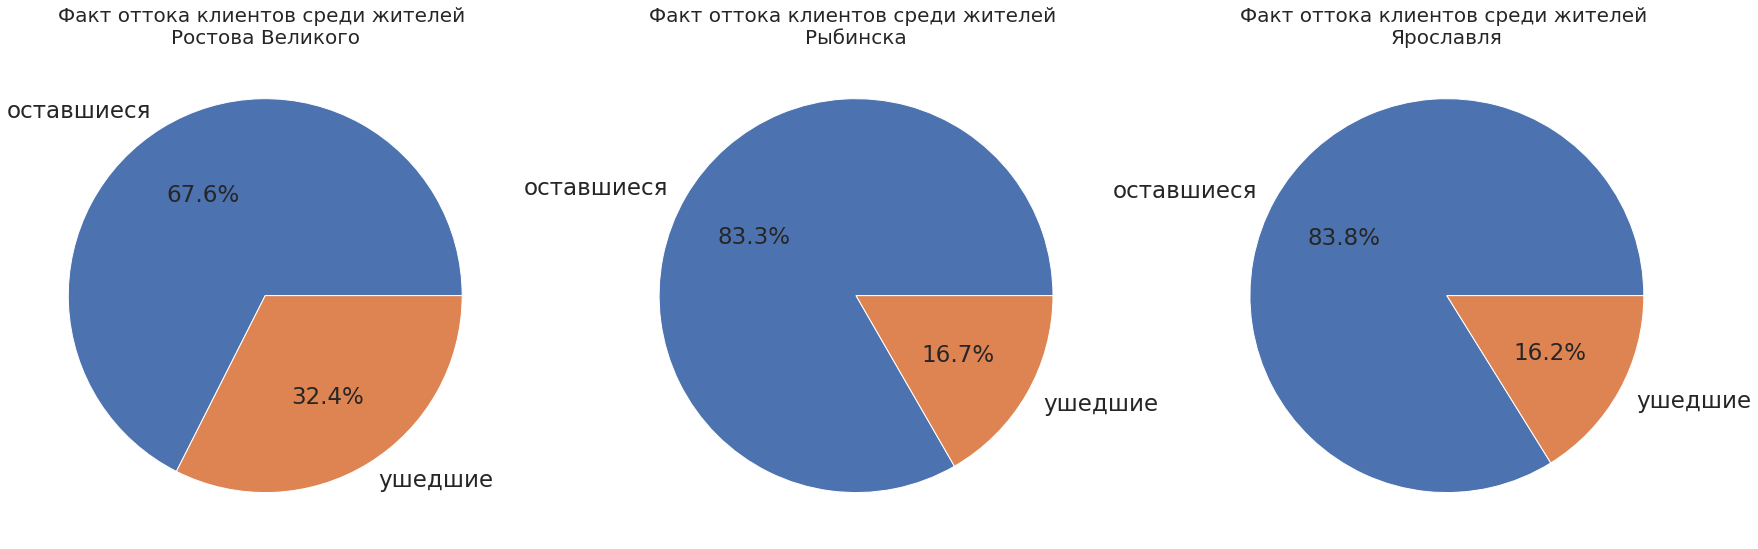

Ростов Великий,churn,0,1
0,0,6268,1695
1,1,1223,814


Рыбинск,churn,0,1
0,0,5899,2064
1,1,1624,413


Ярославль,churn,0,1
0,0,3759,4204
1,1,1227,810


In [43]:
a1 = bank.pivot_table(index='churn',columns='Ростов Великий', values='age', aggfunc='count').reset_index()
a2 = bank.pivot_table(index='churn',columns='Рыбинск', values='age', aggfunc='count').reset_index()
a3 = bank.pivot_table(index='churn',columns='Ярославль', values='age', aggfunc='count').reset_index()


plt.figure(figsize = (30, 30))
def hist(i, k, m, city):
    fig = plt.subplot(1, 3, i + 1)
    plt.pie(x=m[m.columns[k+1]], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 23})
    fig.set_title(f'Факт оттока клиентов среди жителей {city}', fontsize=20)    

hist(0, 1, a1, '\nРостова Великого')
hist(1, 1, a2, '\nРыбинска')
hist(2, 1, a3, '\nЯрославля')

plt.show()

from pandas.io.formats.style import Styler
import seaborn as sns

a1 = a1.style.bar(align='mid', vmin=800, vmax=8000, width=100, color='#d65f5f')
a2 = a2.style.bar(align='mid', vmin=400, vmax=7000, width=100, color='#5f5fd6')
a3 = a3.style.bar(align='mid', vmin=800, vmax=5000, width=100, color='#15d451')

display(a1, a2, a3)

**Вывод**: клиенты из Ростова Великого с большим отрывом предрасположены к оттоку по сравнению с другими городами. Так как клиенты банка "Метанпром" в городе Ростов составляют около 8% от всего числа местных жителей, что достаточно большое значение, а также то, что этот город самый маленький по численности населения относительно других представленных городов, то можно предлположить, что в Ростове появился достаточно весомый конкурент, который своими более выгодными условиями смог расположить к себе ранее наших клиентов<br><br>
**Необходимо:** провести анализ предоставляемых услуг нашего новоявленного конкурента, чтобы, после необходимого анализа предоставлять более выгодные предложения с нашей стороны для клиентов из Ростова, а также и для других более крупных городов (Ярославль и Рыбинск)

### Построим матрицу корреляций и отобразим её

,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,Ростов Великий,Рыбинск,Ярославль,account,active,generation
0,619,0,42,2,NaN,1,1,1,101348.88,1,0,0,1,0,1,adult
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0,adult
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,1,adult
3,699,0,39,1,NaN,2,0,0,93826.63,0,0,0,1,0,1,adult
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0,adult


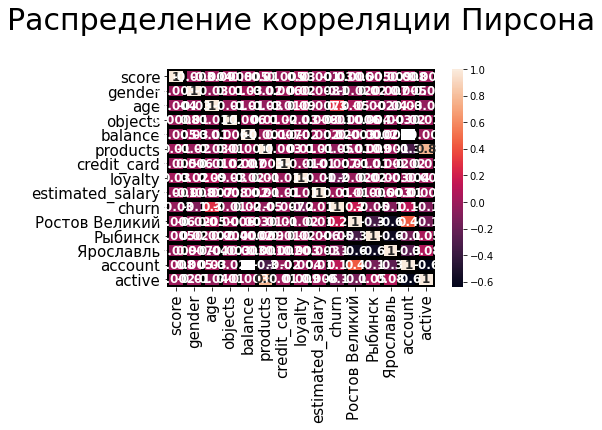

In [24]:
bank_corr = bank.drop(['user_id'], axis=1)

display(bank_corr.head())

cm1 = bank_corr.corr() #вычисляем матрицу корреляций

sns.heatmap(cm1, annot=True, fmt='.0g', linewidths=3, linecolor='black', annot_kws={'size':12,'weight':'bold'})
plt.title('Распределение корреляции Пирсона\n', fontsize=30)
sns.set(rc = {'figure.figsize':(20,20)})
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

**Оценка с полученной тепловой гистограммы:** 
- клиенты, которые пользуются дебетовой картой, с меньшей вероятностью пользуются и другими услугами банка;
- высокая корреляция наблюдается между параметрами возраст клиента и факт его оттока;
- клиенты из Ростова Великого больше предпочитают открывать дебетовый счет, чем жители из других представленных городов. Также для ростовчан более характерен отток из банка 


**Результат полученный работы:** по причине возможных нелинейных связей между признаками дополнительно посмотрим на корреляцию Спирмена и коэффициент корреляции Phik для более наглядного улавливания взаимосвязей

<br> *Отобразим тепловую гистограмму с распределением корреляции Спирмена по всему датафрейму:*

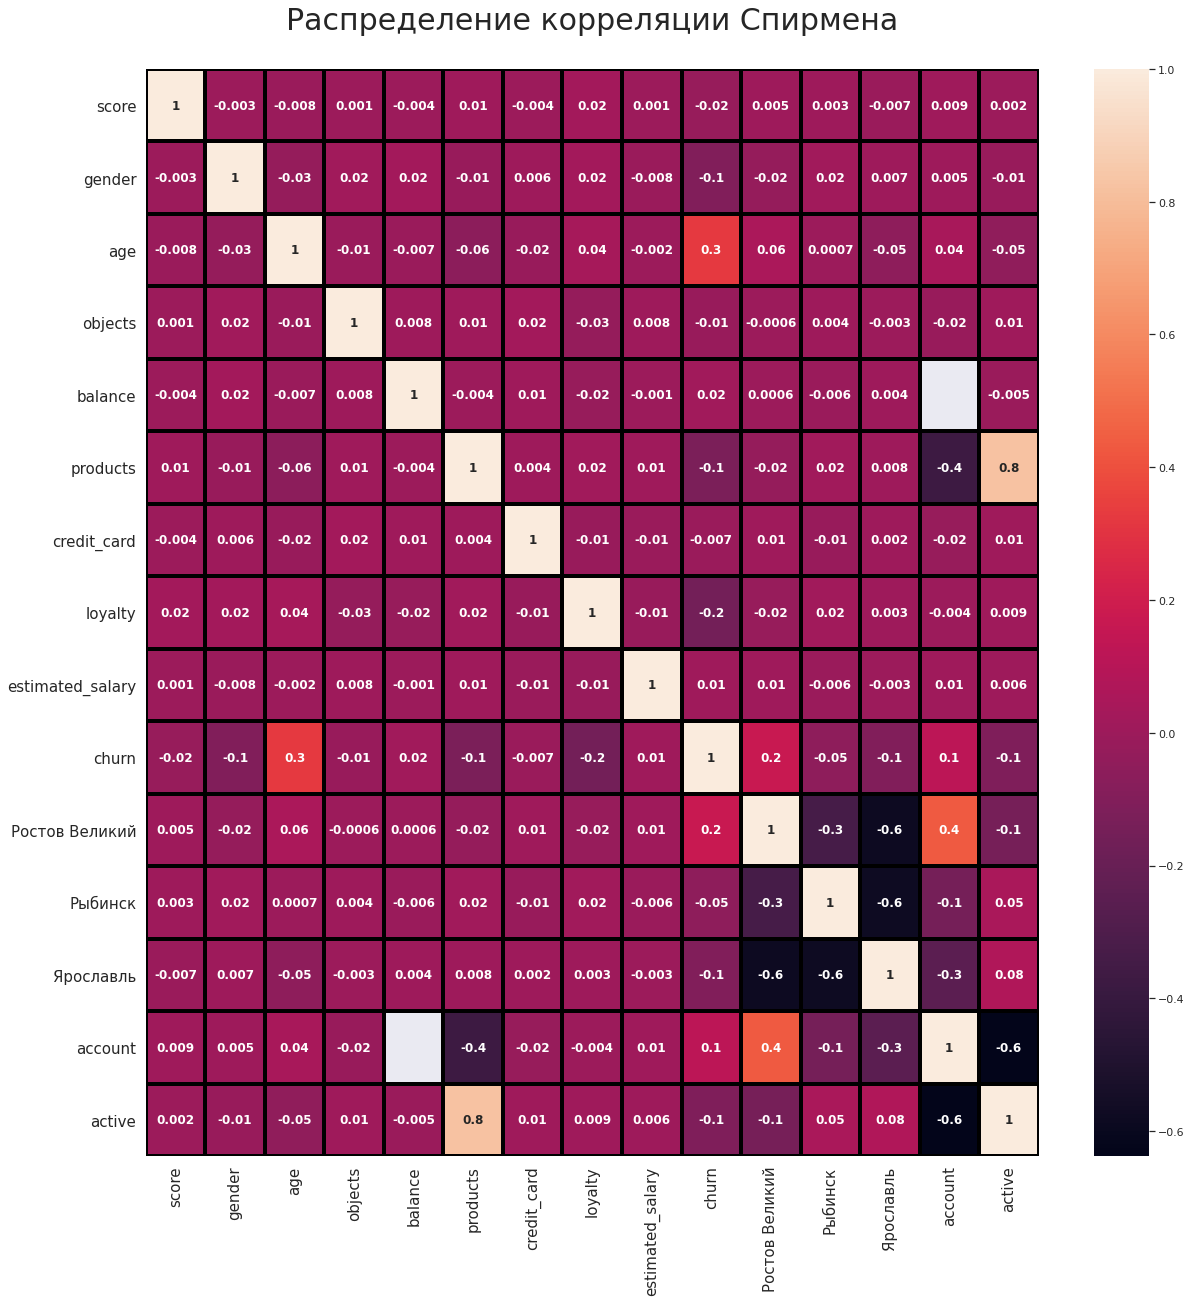

In [25]:
from scipy.stats import spearmanr

kendall = bank_corr.corr('spearman')

sns.heatmap(kendall, annot=True, fmt='.0g', linewidths=3, linecolor='black', annot_kws={'size':12,'weight':'bold'})
plt.title('Распределение корреляции Спирмена\n', fontsize=30)
sns.set(rc = {'figure.figsize':(20,20)})
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

**Оценка с полученной тепловой гистограммы:** <br>
Корреляция Спирмена новых взаимосвязей не выявила, а лишь подтвердила старые!

<br> *Отобразим тепловую гистограмму с распределением корреляции Phik:*

interval columns not set, guessing: ['score', 'gender', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn', 'Ростов Великий', 'Рыбинск', 'Ярославль', 'account', 'active']


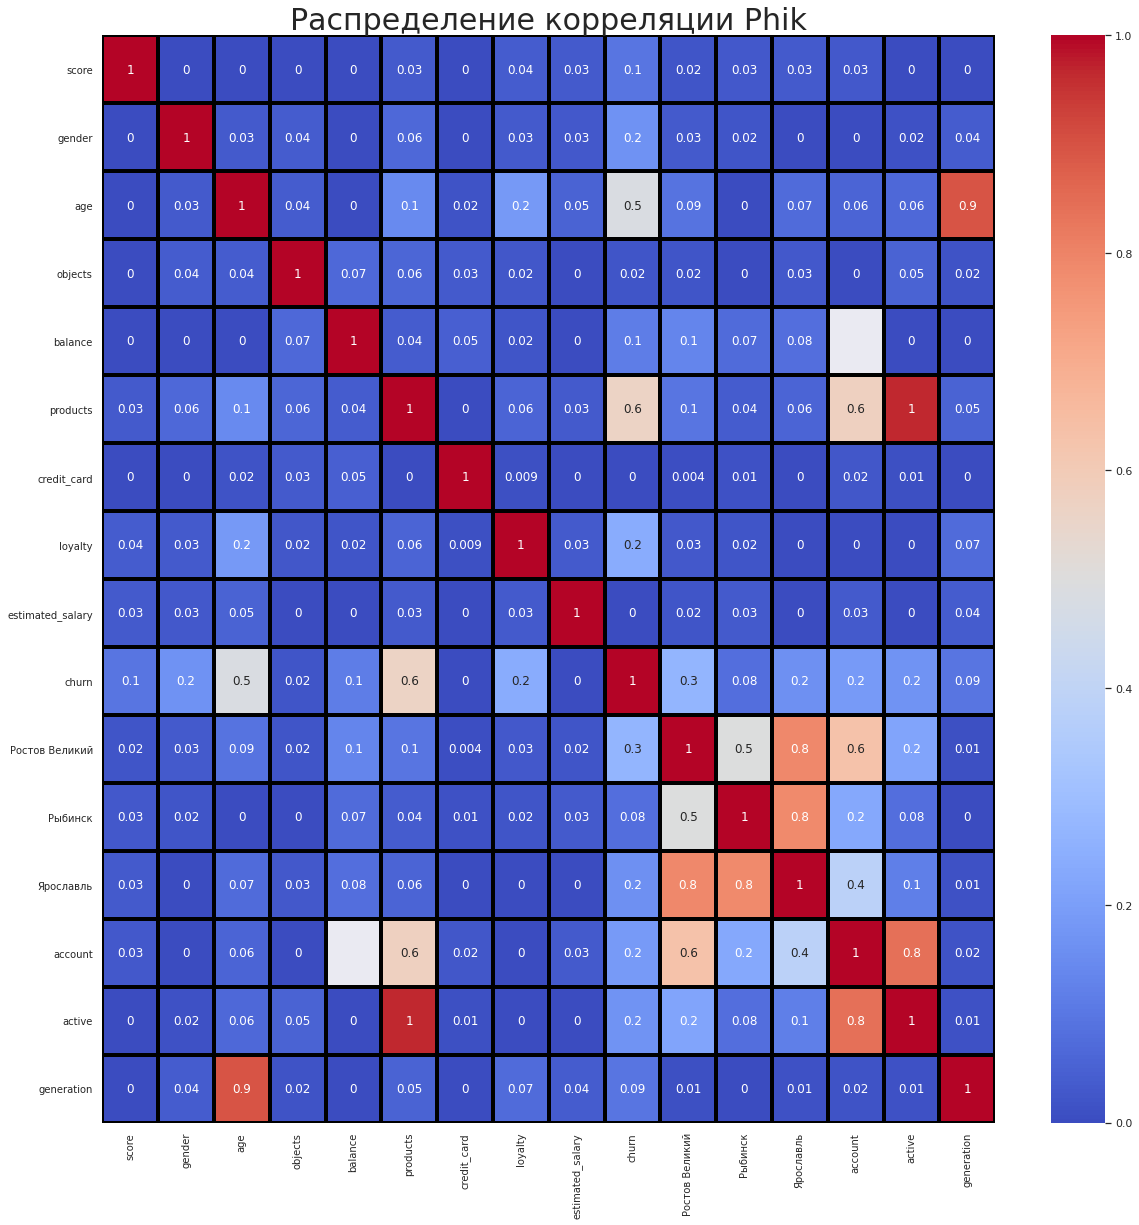

interval columns not set, guessing: ['score', 'gender', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn', 'Ростов Великий', 'Рыбинск', 'Ярославль', 'account', 'active']


/opt/conda/lib/python3.9/site-packages/phik/significance.py:343: UserWarning: Too few unique values for variable balance (10) or account (1) to calculate significance
  warnings.warn(


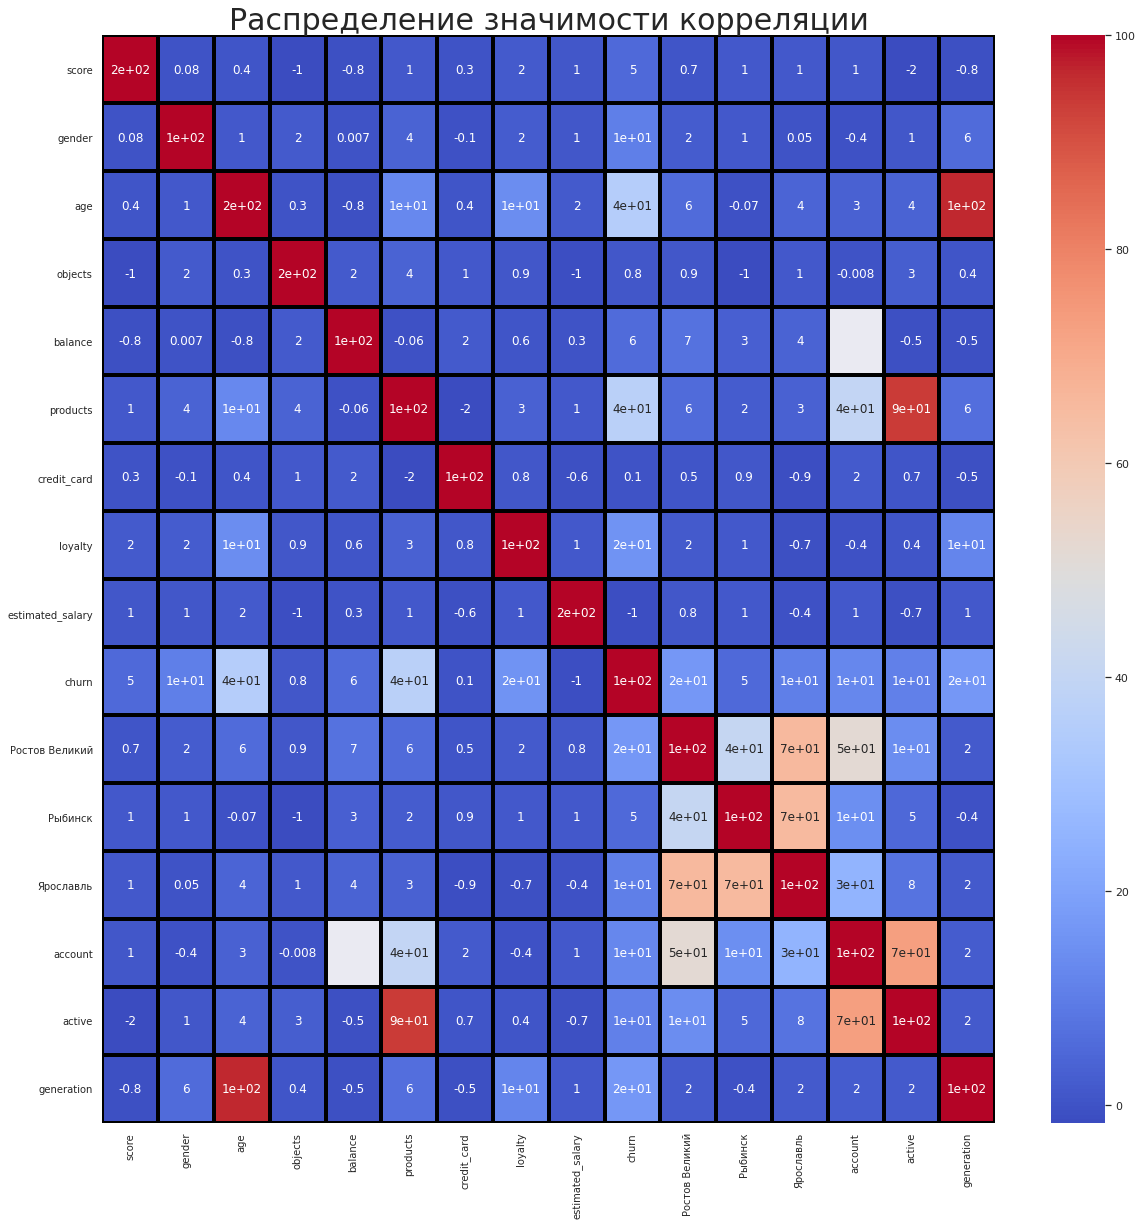

<Figure size 1440x1440 with 0 Axes>

In [35]:
# Загрузим необходимые библиотеки:
!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

# Выведем тепловую гистограмму с распределением корреляции Phik:
phik = bank_corr.phik_matrix()
sns.heatmap(phik, annot=True, fmt='.0g', linewidths=3, linecolor='black', cmap= 'coolwarm')
sns.set(rc = {'figure.figsize':(20,20)})
plt.title('Распределение корреляции Phik', fontsize=30)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

# Выведем на экран тепловую шимтограмму со значимостью коэффициентов:
significance_overview = bank_corr.significance_matrix()
sns.heatmap(significance_overview, annot=True, fmt='.0g', vmax=100, cmap= 'coolwarm', linewidths=3, linecolor='black')
sns.set(rc = {'figure.figsize':(20,20)})
plt.title('Распределение значимости корреляции', fontsize=30)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()
plt.tight_layout()

**Оценка с полученной тепловой гистограммы:** <br>
Благодаря оценке распределения корреляции Phik и распределение ее значимости удалось выявить слабую связь между параметрами `products` и `churn`. Взаимосвязь следующая: чем больше количество продуктов банка, тем выше вероятность покинуть банк

**Результат полученный работы:** попобуем оценить данную информацию при помощи дополнительных графиков и расчетов

<br> *Отобразим зависимость оттока клиентов от количества продуктов банка*:

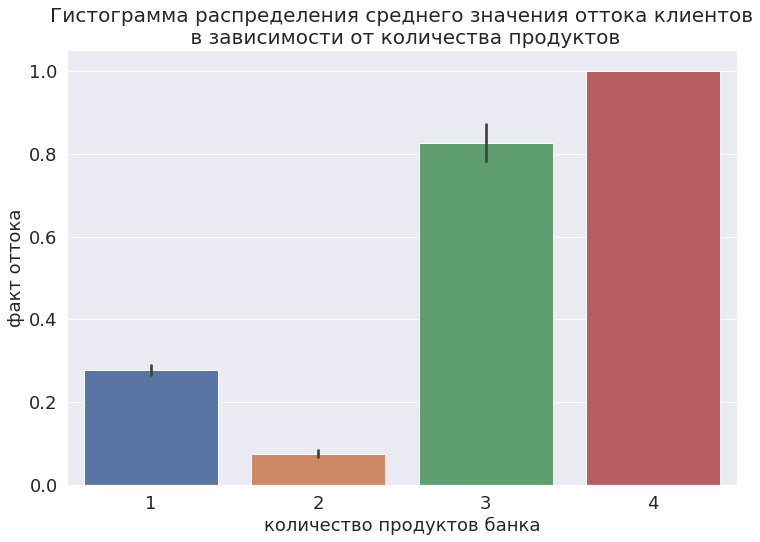

Среднее значение оттока клиентов, которые имеют 3 и более количество продуктов банка:  0.8588957055214724
Среднее значение оттока клиентов, которые имеют 4 и более количество продуктов банка:  1.0
Количество клиентов, которые имеют 3 и более количество продуктов банка: 326 (процент от общего числа клиентов: 3.26 % )


In [40]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="products", y="churn", data=bank)
plt.ylabel('факт оттока',fontsize = 18)
plt.xlabel('количество продуктов банка',fontsize = 18)
plt.title(f'Гистограмма распределения среднего значения оттока клиентов\n в зависимости от количества продуктов', fontsize=20)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.show()

print('Среднее значение оттока клиентов, которые имеют 3 и более количество продуктов банка: ', 
      bank[df['products'] > 2]['churn'].mean())
print('Среднее значение оттока клиентов, которые имеют 4 и более количество продуктов банка: ', 
      bank[df['products'] > 3]['churn'].mean())
print('Количество клиентов, которые имеют 3 и более количество продуктов банка:', 
      bank[df['products'] > 2].shape[0], 
      '(процент от общего числа клиентов:', ((bank[df['products'] > 2].shape[0])/(bank.shape[0]))*100,'% )')

<br>*Отобразим средние значения параметров для клиентов с большим и малым количеством продуктов:*

In [ ]:
data1 = bank[df['products'] > 2].mean().to_frame().T
data2 = bank[df['products'] < 3].mean().to_frame().T

data3 = pd.concat([data1, data2]).reset_index().style.background_gradient(cmap=cm) #большее число в каждом столбце будет высвечиваться голубым цветом
data3

Ничего нового отобразить не вышло

**Вывод:**

Из всего раннее сказанного хочется добавить, что клиенты, у которых количество продуктов равно 3 или 4 более предрасположены к оттоку, чем те клиенты, у которых этих продуктов меньше. И хоть количество клиентов с большм количеством продуктов банка невелико (3,26% от всего количества клиентов), но тенденция оттока по таким клиентам налицо<br><br>
**Необходимо:** 
- увеличивать привилегии для клиентов, которые пользуются большим количеством продуктов (увеличения процентов по вкладам, уменьшение стоимости годового обслуживания карты, уменьшение процентов по кредитам и пр.);
- создавать продвинутую экосистему банка для привлечения клиентов к приобретению новых продуктов

### Подведем итог второй части:

1. **Клиенты банка это:**
- Мужчины и женщины примерно в равном соотношении, которым около 38 лет;
- Больше всего клиентов банка из Ярославля (50,1% от общего числа), далее идет Рыбинск(25,1%), затем Ростов(24,9%);
- Самая большая доля клиентов банка от общего количества населения города у Ростова (8,1%), затем у Рыбинск(1,3%) и Ярославля (0,8%);
- Количество имуществ в наличии около 5
<br><br>
2. **Информация о клиентах на основе их истории активности в банке:**
- Примерно половина клиентов имеют из услуг только дебетовую карту;
- Кредитный скоринг у большого числа клиентов банка достаточен для того, чтобы взять кредит;
- Те, у кого есть дебетовый счет, в среднем имеют на нем в районе 120,000 рублей;
- Большая часть клиентов имеет кредитную карту и счет в банке;
- Имеют более одного продукта банка;
- Средняя ЗП в районе 100,000 рублей 
<br><br>
3. **Оценка результата после детального анализа данных:**<br>
- Клиенты женского пола более склоны к оттоку чем мужчины;
- Из Ростова самый большой отток клиентов;
- Клиенты, которые владеют большим количеством продуктов (в т.ч. не только дебетовым счетом), меньше склонны к оттоку;
- Клиенты, которые за последнее время хоть раз посетили банк, меньше уходят после него;
- Клиенты более склонного возраста чаще уходят из банка
- Клиенты, которые пользуются дебетовой картой, с большой вероятностью пользуются и другими услугами банка
- Клиенты c большим количеством продуктов банка (более 3) более предрасположены к оттоку, чем те клиенты, у которых этих продуктов меньше. И хоть количество клиентов с большм количеством продуктов банка невелико (3,26% от всей доли клиентов), но тенденция оттока по таким клиентам налицо
<br><br>
4. **Выводы и рекомендации с полученных данных:** <br>
- создавать благоприятные условия для открытия накопительных счетов с созданием более высоких процентов для пенсионеров;
- повысить клиентоориентированность персонала банка путем проведения тренингов и различных семинаров по повышению клиентоориентированности;
- повысить доступность услуг банка путем увеличения количество его филиалов в городе присутствия, а также при помощи развития мобильного банка для удаленного пользования
- привлекать клиентов доступным кредитованием (в т.ч. ипотека);
- привлекать крупным процентам по вкладам;
- начислять кэшбек за покупки в т.ч. и при оплачивании покупок кредитной картой;
- продвигать сотрудничество с компаниями, которые бы предоставляли свою скидку клиентам нашего банка
- у прямых конкурентов, которые сейчас на подъеме, проверить чем они смогли заинтересовать раннее наших клиентов, чтобы проанализировав их подход, перенять у них лучший опыт
- провести анализ предоставляемых услуг нашего нового конкурента в Ростове, чтобы, после необходимого анализа предоставлять более выгодные предложения с нашей стороны для клиентов из этого города, а также и для других более крупных городов (Ярославль и Рыбинск)
- увеличивать привелегии для клиентов, которые пользуются большим количеством продуктов (увеличением процентов по вкладам, уменьшением стоимости годового обслуживания карты, уменьшением процентов по кредитам и пр.);
- создавать продвинутую экосистему банка для привличения клиентов к приобретению новых продуктов

##  Изучим результаты эксперимента

### Посчитаем статистическую значимость различий  в зарплате между теми клиентами, которые ушли и теми, которые остались

**Сформулируем гипотезы**

*Нулевая*: различия в зарплате между теми клиентами, которые ушли и теми, которые остались, не значительны<br>
*Альтернативная*: существуют различия в зарплате между теми клиентами, которые ушли и теми, которые остались<br>
*p-value = 0.05* (уровень значимости)

In [ ]:
import scipy.stats as stats

df_drop = bank.dropna()

# определим статистическую значимость между доходами в двух наблюдаемых группах:
print('{0:.3f}'.format(stats.mannwhitneyu(bank[bank['churn']==0]['estimated_salary'], 
                                          bank[bank['churn']==1]['estimated_salary'])[1]))

# определим отншение среднего дохода клиентов, которые ушли, к среднему доходу клиентов, которые остались:
print('{0:.3f}'.format(bank[bank['churn']==0]['estimated_salary'].mean()/
                       bank[bank['churn']==1]['estimated_salary'].mean()-1))

**Вывод по полученным данным:**

- *p-value* значительно больше 0.05. Значит не существует весомых различий между зарплатами клиентов, которые ушли и теми, которые остались, поэтому принимаем нулевую гипотезу
<br>
- Зарплата клиентов, которые остались, в среднем в 1.017 раза выше тех, кто ушел, что является незначительным расхождением
<br>
- Причина массового оттока клиентов заключается не в низком уровне зарплаты

### Посчитаем статистическую значимость различий  в значении кредитного скоринга между теми клиентами, которые ушли и теми, которые остались

**Сформулируем гипотезы**

*Нулевая*: различие в значении кредитного скоринга между теми клиентами, которые ушли и теми, которые остались, не значительна<br>
*Альтернативная*: существует различие в значении кредитного скоринга клиентов, которые ушли и теми, которые остались<br>
*p-value = 0.05* (уровень значимости)

In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(bank[bank['churn']==0]['score'], 
                                          bank[bank['churn']==1]['score'])[1]))

print('{0:.3f}'.format(bank[bank['churn']==0]['score'].mean()/
                       bank[bank['churn']==1]['score'].mean()-1))

**Вывод по полученным данным:**

- *p-value* меньше 0.05. Значит существуют весомые различия между значением кредитного скоринга клиентов, которые ушли и теми, которые остались, поэтому принимаем альтернативную гипотезу гипотезу
<br>
- Кредитный скоринг клиентов, которые остались, в среднем в 1.01 раза выше тех, кто ушел, что является значительным расхождением
<br>
- Причина массового оттока клиентов заключается в более трудной выплате кредитов
<br>
- Причина существенного расхождения в значении скоринга может заключаться в том, что клиенты, которые ушли с нашего банка решили рефинансировать свой кредит в другом банке. Поэтому стоит поднять вопрос по смягчению условий кредитования, а также предоставлять своевременные кредитные каникулы в индивидуальном порядке, ссылаясь на портреты клиентов, которые были получены выше

### Подведем итог третьей части:

- Зарплата клиентов, которые остались, в среднем в 1.017 раза выше тех, кто ушел, что является незначительным расхождением;
<br>
- Причина массового оттока клиентов заключается не в низком уровне зарплаты;
<br>
- Кредитный скоринг клиентов, которые остались, в среднем в 1.01 раза выше тех, кто ушел, что является значительным расхождением;
<br>
- Причина массового оттока клиентов заключается в более трудной выплате кредитов;
<br>
- Причина существенного расхождения в значении скоринга может заключаться в том, что клиенты, которые ушли с нашего банка решили рефинансировать свой кредит в другом банке. Поэтому стоит поднять вопрос по смягчению условий кредитования, а также предоставлять своевременные кредитные каникулы в индивидуальном порядке, ссылаясь на портреты клиентов, которые были получены в предыдущем разделе данного исследования

## Итог исследования

1. **Ход исследования**:
 - Обработали и подготовили исходных данные к анализу;
 - Сформировали типичные портреты клиентов;
 - Проанализировали основные признаки, наиболее сильно влияющие на отток;
 - Сформулировали и проверили статистические гипотезы, влияющие на отток клиентов
<br><br>
2. **Типичный портрет клиента банка "Метанпром" следующий:**
 - Мужчины и женщины примерно в равном соотношении, которым около 38 лет;
 - Больше всего клиентов банка из Ярославля (50,1% от общего числа), далее идет Рыбинск(25,1%), затем Ростов(24,9%);
 - Самая большая долю клиентов банка от общего количества населения города у Ростова (8,1%), затем у Рыбинск(1,3%) и Ярославля (0,8%);
 - Количество имуществ в наличии около 5
 - Примерно половина клиентов имеют из услуг только дебетовую карту;
 - Кредитный скоринг у большого числа клиентов банка достаточен для того, чтобы взять кредит;
 - Те, у кого есть дебетовый счет, в среднем имеют на нем в районе 120,000 рублей;
 - Большая часть клиентов имеет кредитную карту и счет в банке;
 - Имеют более одного продукта банка;
 - Средняя ЗП в районе 100,000 рублей 
<br><br><br>
3. **Факторы, которые наиболее сильно влияют на отток клиентов:**
 - Клиенты женского пола более склоны к оттоку чем мужчины;
 - Из Ростова самый большой отток клиентов;
 - Клиенты, которые владеют большим количеством продуктов (в т.ч. не только дебетовым счетом), меньше склонны к оттоку;
 - Клиенты, которые за последнее время хоть раз посетили банк, меньше уходят после него;
 - Клиенты более склонного возраста чаще уходят из банка
 - Клиенты, которые пользуются дебетовой картой, с большой вероятностью пользуются и другими услугами банка
<br><br><br>
4. **Итог статистических гипотез, взятых на проверку:**
 - Зарплата клиентов, которые остались, в среднем в 1.017 раза выше тех, кто ушел, что является незначительным расхождением;
 - Причина массового оттока клиентов заключается не в низком уровне зарплаты;
 - Кредитный скоринг клиентов, которые остались, в среднем в 1.01 раза выше тех, кто ушел, что является значительным расхождением;
 - Причина массового оттока клиентов заключается в более трудной выплате кредитов;
 - Причина существенного расхождения в значении скоринга может заключаться в том, что клиенты, которые ушли с нашего банка решили рефинансировать свой кредит в другом банке. Поэтому стоит поднять вопрос по смягчению условий кредитования, а также предоставлять своевременные кредитные каникулы в индивидуальном порядке, ссылаясь на портреты клиентов, которые были получены в предыдущем разделе данного исследования
<br><br><br> 
5. **Предполагаемые меры по снижению оттока клиентов:** 
 - Создавать благоприятные условия для открытия накопительных счетов с созданием более высоких процентов для пенсионеров;
 - Повысить клиентоориентированность персонала банка путем проведения тренингов и различных семинаров по повышению клиентоориентированности;
 - Повысить доступность услуг банка путем увеличения количество его филиалов в городе присутствия, а также при помощи развития мобильного банка для удаленного пользования
 - Привлекать клиентов доступным кредитованием (в т.ч. ипотека);
 - Привлекать крупным процентам по вкладам;
 - Начислять кэшбек за покупки в т.ч. и при оплачивании покупок кредитной картой;
 - Продвигать сотрудничество с компаниями, которые бы предоставляли свою скидку клиентам нашего банка
 - У прямых конкурентов, которые сейчас на подъеме, проверить чем они смогли заинтересовать раннее наших клиентов, чтобы проанализировав их подход, перенять у них лучший опыт
 - Провести анализ предоставляемых услуг нашего нового конкурента в Ростове, чтобы, после необходимого анализа предоставлять более выгодные предложения с нашей стороны для клиентов из этого города, а также и для других более крупных городов (Ярославль и Рыбинск);
 - Стоит поднять вопрос по смягчению условий кредитования, а также предоставлять своевременные кредитные каникулы в индивидуальном порядке, ссылаясь на портреты клиентов, которые описаны выше
<br><br><br> 
6. **При выполнении вышеуказанных рекомендаций с большой долей вероятностью отток уменьшится. Но также необходимо не забывать о постоянном тщательном анализе текущего состояния оттока клиентов, чтобы своевременно принимать меры по его сокращению. Спустя некоторое время похожий анализ стоит повторить**  